<a href="https://colab.research.google.com/github/ClarisseAlvarenga/lives_twitch/blob/master/Imers%C3%A3o_Alura_Desafio_Final_Clarisse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importando nossas bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **IMERSÃO ALURA DADOS - DESAFIO FINAL**

## **COMO A CLASSE SOCIAL INTERFERE NO DESEMPENHO DO ENEM**

Para esta análise, vamos considerar o questionário socio-econômico do ENEM, que traz, entre outras coisas as faixas de renda. Consideraremos sempre a maior renda da faixa estipulada pelo ENEM, e como teto salarial vamos considerar o salário do Ministro do Supremo Tribunal Federal, que em 2019 era de R$ 43.615,58 - que foi escolhido como parâmetro de acordo com o art. 37 inciso XI da Constituição Federal Brasileira,  que diz:



> *XI - a remuneração e o subsídio dos ocupantes de cargos, funções e empregos públicos da administração direta, autárquica e fundacional, dos membros de qualquer dos Poderes da União, dos Estados, do Distrito Federal e dos Municípios, dos detentores de mandato eletivo e dos demais agentes políticos e os proventos, pensões ou outra espécie remuneratória, percebidos cumulativamente ou não, incluídas as vantagens pessoais ou de qualquer outra natureza, não poderão exceder o subsídio mensal, em espécie, dos Ministros do Supremo Tribunal Federal, aplicando-se como limite, nos Municípios, o subsídio do Prefeito, e nos Estados e no Distrito Federal, o subsídio mensal do Governador no âmbito do Poder Executivo, o subsídio dos Deputados Estaduais e Distritais no âmbito do Poder Legislativo e o subsídio dos Desembargadores do Tribunal de Justiça, limitado a noventa inteiros e vinte e cinco centésimos por cento do subsídio mensal, em espécie, dos Ministros do Supremo Tribunal Federal, no âmbito do Poder Judiciário, aplicável este limite aos membros do Ministério Público, aos Procuradores e aos Defensores Públicos;*



fonte http://www.stf.jus.br/portal/remuneracao/listarRemuneracao.asp?periodo=112019&ano=2019&mes=11&folha=1



## Conhecendo nossa base de dados

Vamos utilizar a amostra de dados usada durante a Imersão, pois nosso interesse é ter um retrato nacional do impacto da renda.

Nosso desafio será determinar se a pessoa é da classe A, B, C D e E usando a pesquisa socioeconômica da para calcular esta classe e criar uma nova classificação entre os inscritos no ENEM de 2019. 

 fonte https://thiagorodrigo.com.br/artigo/faixas-salariais-classe-social-abep-ibge/

**Classe social para o IBGE**

As classes sociais, para além da classificação marxista, também são classificadas em classe alta, classe baixa e classe média. Para criar uma classificação mais precisa, o Instituto Brasileiro de Geografia e Estatística (IBGE) criou um sistema de medição que abrange cinco estratos sociais, que são as classes A, B, C, D e E, sendo A a classe com maior poder aquisitivo e concentração de renda e E a classe com menor poder aquisitivo e concentração de renda.

A maneira mais fácil e simples de definir os padrões de cada classe social pelo IBGE é por meio da renda familiar mensal. Porém, nem sempre esse indicador socioeconômico é satisfatório, sendo necessário, em alguns casos, analisar a condição socioeconômica de uma pessoa com base em outros indicadores, como aqueles que foram mencionados no parágrafo anterior.



Para este estudo, vamos considerar o salário mínimo de 2019 que era **R$998,00.**

fonte: https://www.guiatrabalhista.com.br/guia/salario_minimo.htm

fonte: https://brasilescola.uol.com.br/sociologia/classe-social.htm

In [2]:
#selecionando a fonte de dados
fonte = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"

In [3]:
#leitura de dados
dados = pd.read_csv(fonte)

### **Criar dicionários para lidar com os dados**

#### **- Criando o limite superior das classes**

*   **Classe A:** será o salário do  Ministro do STF

*   **Classe B:** de 5 a 15 salários mínimos;

* **Classe C**: de 3 a 5 salários mínimos;

* **Classe D:** de 1 a 3 salários mínimos;

* **Classe E:** até 1 salário mínimo.



In [4]:
#criando os limites superiores das classes:
salario_minimo = 998.00
a = 43615.58 #salário do Ministro do Superior Tribunal Federal
b = 15 * salario_minimo #14.970,00
c = 5 * salario_minimo # 4.990,00
d = 3 * salario_minimo # 2.994,00
e = salario_minimo # 998,00

In [5]:
#Q006 = Renda familiar de A a Q quanto maior mais alta a renda 
renda_familiar = {
    "A"	: 0,
    "B": 	998.00,
    "C":	1497.00,
    "D":	1996.00,
    "E":	2495.00,
    "F":	2994.00,
    "G":	3992.00,
    "H":	4990.00,
    "I":  5988.00,
    "J":	6986.00,
    "K":	7984.00,
    "L":	8982.00,
    "M":  9980.00,
    "N":	11976.00,
    "O":	14970.00,
    "P":  19960.00,
    "Q": 	43615.58
}

In [6]:
#criando outros dicionários de dados para facilitar a análise
genero = { 'M': 0, 'F':1}
conclusao = {
    1: 'ensino médio concluído',
    2: 'cursando, conclusão em 2019',
    3: 'cursando, conclusão após 2019',
    4: 'ensino médio não concluído e não cursando'
}
tipo_escola = {
    1: 'sem resposta', 
    2: 'pública',
    3: 'privada',
    4: 'exterior',
}

tipo_ensino = {
    1: 'regular',
    2: 'especial',
    3: 'EJA'   
}
localizacao_escola = {
    1: 'urbana',
    2: 'rural'
}
tipo_presenca = {
    0:'faltou',
    1:'presente',
    2:'eliminado'
}
idioma_estrangeiro = {
    0: 'inglês',
    1: 'espanhol'
}



## **Lendo os dados**

In [7]:
#visualizando os 5 primeiros itens dos nossos dados
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ACAEAAACABEBABAADCEEEDE*CBDCCCADADCCCBEBBBBDB,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ABBCEADCEBAAACACEDCDCDACCCACDCBCABCAACBDBDEDE,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CDCAACCAAADEACBBEBAAEECDABDEBAEAABEDCABABAABC,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EECCCEDBADBEAAAAEBAECEAAAAEEEBACCAC*CEAEDAECE,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CCBCBEACABACABBBBACCBCEBDCBABCADADCBCADBAADEA,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B


In [8]:
#visualizando nossas colunas
dados.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       ...
       'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024',
       'Q025'],
      dtype='object', length=136)

### **Criando nossa coluna de classes sociais**

**O primeiro passo é criar uma coluna de renda familiar com os limites superiores da questão 006**

In [9]:
#inserindo antes da idade
dados.insert(6, 'NU_RENDA_FAMILIAR', dados.Q006.replace(renda_familiar))

In [10]:
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_RENDA_FAMILIAR,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,998.0,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,ACAEAAACABEBABAADCEEEDE*CBDCCCADADCCCBEBBBBDB,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,998.0,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,ABBCEADCEBAAACACEDCDCDACCCACDCBCABCAACBDBDEDE,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,1497.0,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,CDCAACCAAADEACBBEBAAEECDABDEBAEAABEDCABABAABC,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,998.0,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,EECCCEDBADBEAAAAEBAECEAAAAEEEBACCAC*CEAEDAECE,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,2495.0,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,CCBCBEACABACABBBBACCBCEBDCBABCADADCBCADBAADEA,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B


**O segundo passo será criar uma coluna de renda per capita, usando a resposta da Q005, que diz: "*Incluindo você, quantas pessoas moram atualmente em sua residência?*"**

In [11]:
#inserindo antes da idade
dados.insert(7, 'NU_RENDA_PER_CAPITA', (dados.NU_RENDA_FAMILIAR/dados.Q005))

In [12]:
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_RENDA_FAMILIAR,NU_RENDA_PER_CAPITA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,998.0,249.500000,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,...,ACAEAAACABEBABAADCEEEDE*CBDCCCADADCCCBEBBBBDB,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,998.0,249.500000,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,...,ABBCEADCEBAAACACEDCDCDACCCACDCBCABCAACBDBDEDE,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,1497.0,299.400000,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,...,CDCAACCAAADEACBBEBAAEECDABDEBAEAABEDCABABAABC,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,998.0,998.000000,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,...,EECCCEDBADBEAAAAEBAECEAAAAEEEBACCAC*CEAEDAECE,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,2495.0,831.666667,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,...,CCBCBEACABACABBBBACCBCEBDCBABCADADCBCADBAADEA,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B


**Criando uma coluna com as classes sociais, considerando o teto de cada faixa no questionário do ENEM**

In [13]:
#criando o rótulo das classes
classes = ['E', 'D', 'C', 'B', 'A']

In [14]:
#dividindo em classes, usando o pandas.cut
dados['CLASSE_SOCIAL_FAMILIAR'] = pd.cut(dados['NU_RENDA_FAMILIAR'],
                                         right=True,labels = classes, 
                                         bins=[0,e,d,c,b,a], include_lowest=True)


Vamos utilizar agora a média de pessoas por domicílio de 2,9 pessoas para determinar nossos novos limiares de classes,para criar uma coluna de Classe Social Per Capita, que será representada pelos limites de renda_familiar/2,9.

fonte: https://www.istoedinheiro.com.br/maioria-dos-brasileiros-mora-em-casa-e-e-dona-do-imovel-mostra-ibge/#:~:text=No%20pa%C3%ADs%2C%20em%20cada%20domic%C3%ADlio,m%C3%A9dia%2C%202%2C9%20pessoas

In [15]:
#dividindo o limite superior das classes pelo valor por indivíduo médio numa família
media_pessoas_por_familia = 2.9
A = a/media_pessoas_por_familia
B = b/media_pessoas_por_familia
C = c/media_pessoas_por_familia
D = d/media_pessoas_por_familia
E = e/media_pessoas_por_familia
(A,B,C,D,E)

(15039.855172413794,
 5162.068965517242,
 1720.689655172414,
 1032.4137931034484,
 344.1379310344828)

In [16]:
#dividindo em classes, usando o pandas.cut
dados['CLASSE_SOCIAL_PER_CAPITA'] = pd.cut(dados['NU_RENDA_PER_CAPITA'],
                                         right=True,labels = classes, 
                                         bins=[0,E,D,C,B,A], include_lowest=True)

In [17]:
#conferindo se a divisão ficou coerente com o critério do IBGE e nosso critério per capita
#VISUALIZANDO APENAS AS COLUNAS DE RENDA E CLASSES SOCIAIS CRIADAS
dados[['NU_RENDA_FAMILIAR', 'CLASSE_SOCIAL_FAMILIAR','NU_RENDA_PER_CAPITA', 'CLASSE_SOCIAL_PER_CAPITA']]

,NU_RENDA_FAMILIAR,CLASSE_SOCIAL_FAMILIAR,NU_RENDA_PER_CAPITA,CLASSE_SOCIAL_PER_CAPITA
0,998.0,E,249.500000,E
1,998.0,E,249.500000,E
2,1497.0,D,299.400000,E
3,998.0,E,998.000000,D
4,2495.0,D,831.666667,D
...,...,...,...,...
127375,3992.0,C,1330.666667,C
127376,998.0,E,249.500000,E
127377,998.0,E,998.000000,D
127378,1497.0,D,748.500000,D


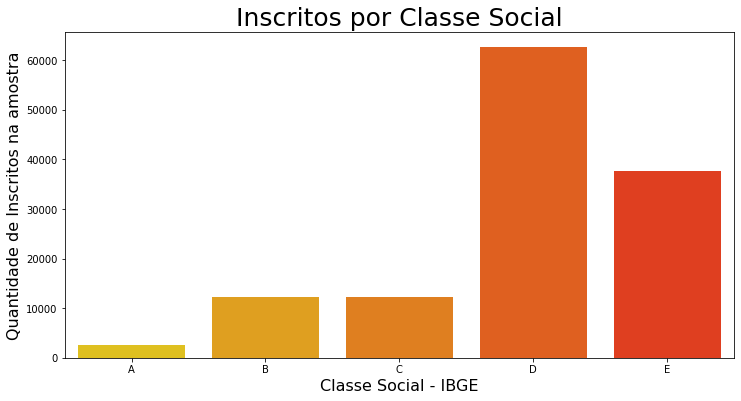

In [18]:
#visualizando quantos candidatos temos em cada classe social
plt.figure(figsize=(12,6))
ax = sns.countplot(x=dados['CLASSE_SOCIAL_FAMILIAR'], 
                   order=['A', 'B', 'C', 'D', 'E'],
                   palette='autumn_r')
ax.set_title('Inscritos por Classe Social', fontsize=25)
ax.set_xlabel('Classe Social - IBGE', fontsize=16)
ax.set_ylabel('Quantidade de Inscritos na amostra', fontsize=16);


Podemos ver uma grande concentração da nossa amostra entre as classes sociais D e E, refletindo a desigualdade social brasileira

### **Para nossas próximas análises, vamos criar uma coluna com a soma de todas as notas nas provas**

In [19]:
#criando uma lista com as notas das provas
provas = ['NU_NOTA_LC', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_REDACAO']
#criando uma coluna com o somatório das notas das 5 provas
dados['NU_NOTA_TOTAL'] = dados[provas].sum(axis=1)


In [20]:
#calculando as médias da soma das notas por classe social
media_a = dados[dados.CLASSE_SOCIAL_FAMILIAR == 'A'].NU_NOTA_TOTAL.mean()
media_b = dados[dados.CLASSE_SOCIAL_FAMILIAR == 'B'].NU_NOTA_TOTAL.mean()
media_c = dados[dados.CLASSE_SOCIAL_FAMILIAR == 'C'].NU_NOTA_TOTAL.mean()
media_d = dados[dados.CLASSE_SOCIAL_FAMILIAR == 'D'].NU_NOTA_TOTAL.mean()
media_e = dados[dados.CLASSE_SOCIAL_FAMILIAR == 'E'].NU_NOTA_TOTAL.mean()
(media_a, media_b, media_c, media_d, media_e)


(2660.3872274143305,
 2514.044842865351,
 2275.505274244512,
 1889.9548266615568,
 1747.072298697849)

In [21]:
# #calculando as medianas da soma das notas por classe social
media_a = dados[dados.CLASSE_SOCIAL_FAMILIAR == 'A'].NU_NOTA_TOTAL.median()
media_b = dados[dados.CLASSE_SOCIAL_FAMILIAR == 'B'].NU_NOTA_TOTAL.median()
media_c = dados[dados.CLASSE_SOCIAL_FAMILIAR == 'C'].NU_NOTA_TOTAL.median()
media_d = dados[dados.CLASSE_SOCIAL_FAMILIAR == 'D'].NU_NOTA_TOTAL.median()
media_e = dados[dados.CLASSE_SOCIAL_FAMILIAR == 'E'].NU_NOTA_TOTAL.median()
(media_a, media_b, media_c, media_d, media_e)

(3103.85, 2892.3, 2669.7, 2373.75, 2219.8)

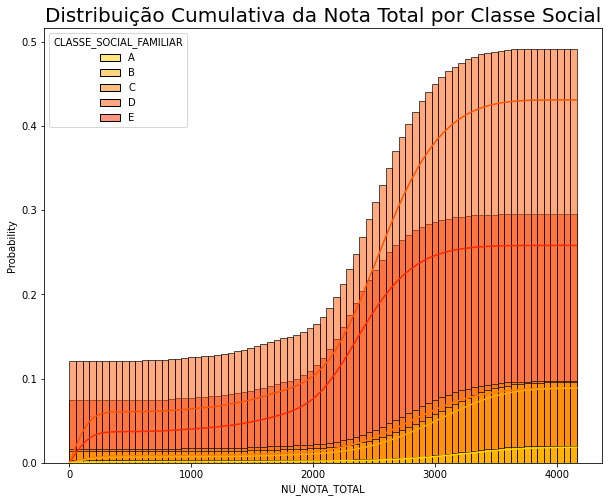

In [22]:
#visualizando a nota de Linguagem e códigos entre os inscritos do ENEM em 2019 (amostra)
plt.figure(figsize=(10,8))
ax = sns.histplot(dados, x='NU_NOTA_TOTAL', kde=True, 
                  hue='CLASSE_SOCIAL_FAMILIAR', 
                  hue_order=['A', 'B', 'C', 'D', 'E'], 
                  palette='autumn_r', stat='probability', cumulative=True)
ax.set_title('Distribuição Cumulativa da Nota Total por Classe Social', fontsize=20);


Conseguimos ver que tanto a média quanto a mediana das notas aumenta junto com a renda, demonstrando claramente a influência da renda e conforto social na performance do inscrito

### Visualizando a distribuição das notas por classe social

Vamos demonstrar agora como estão distribuidas as notas usando o boxplot, que traz dados como a mediana das notas por grupo e também a porcentagem de inscritos acima e abaixo da média e os pontos fora da curva

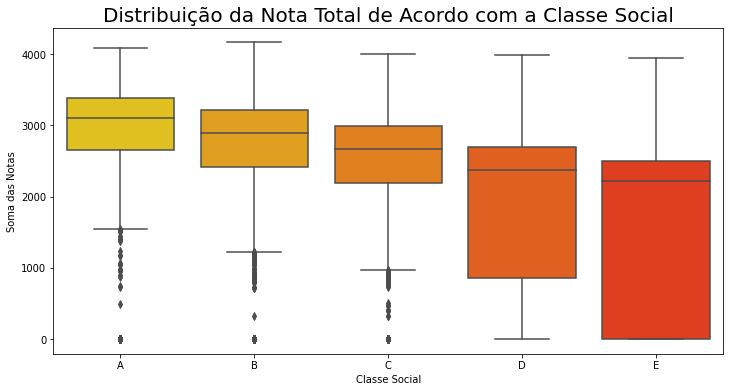

In [23]:
def cria_boxplot(data,y,title,ylabel):
  plt.figure(figsize=(12,6))
  ax = sns.boxplot(data=data, x='CLASSE_SOCIAL_FAMILIAR', 
                  y=y, palette='autumn_r',order=['A', 'B', 'C', 'D', 'E'])
  ax.set_title(title, fontsize=20)
  ax.set_ylabel(ylabel)
  ax.set_xlabel('Classe Social');

cria_boxplot(dados,'NU_NOTA_TOTAL','Distribuição da Nota Total de Acordo com a Classe Social','Soma das Notas')

Este gráfico nos mostra que pelo menos 25% das pessoas da classe "E" somaram 0 em todas as notas do ENEM, o que nos leva a crer que há uma correlação entre a renda e a presença na prova, o que vamos investigar agora

### Conferindo as presenças 

In [24]:
#conferindo a hipótese de que quem estava presente na prova de matemática estava presente na prova de ciências da natureza
dados['TP_PRESENCA_MT'].equals(dados['TP_PRESENCA_CN'])

True

In [25]:
#conferindo a hipótese de que quem estava presente na prova de linguagem estava presente na prova de ciências humanas
dados['TP_PRESENCA_LC'].equals(dados['TP_PRESENCA_CH'])

True

In [26]:
#conferindo a hipótese de que quem estava presente na prova de linguagem estava presente na prova de matemática
dados['TP_PRESENCA_LC'].equals(dados['TP_PRESENCA_MT'])

False

Conclusão: Quem estava presente na prova de Matemática estava presente na prova de Ciências da Natureza e quem estava na prova de Linguagem e Códigos estava presente na prova de Ciências Humanas, mas o mesmo não ocorre entre as provas de Matemática e Linguagem

In [27]:
#criando um dataset com os ausentes
ausentes = dados.query('TP_PRESENCA_LC ==0 & TP_PRESENCA_MT==0')

In [28]:
#conferindo quantos inscritos faltaram à prova nos dois dias
ausentes.shape

(28998, 141)

In [29]:
(ausentes.shape[0]/dados.shape[0])*100

22.764955252001883

28.998 pessoas de nossa amostra não compareceram à prova, o que corresponde a 22,76% de nossa amostra

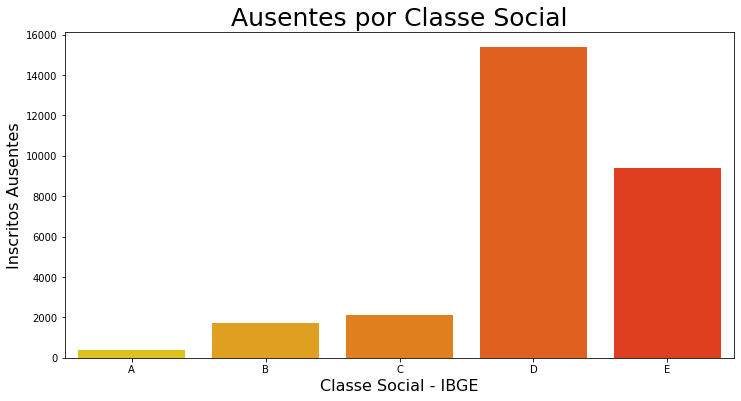

In [30]:
#visualizando quantos candidatos ausente temos em cada classe social
plt.figure(figsize=(12,6))
ax = sns.countplot(x=ausentes['CLASSE_SOCIAL_FAMILIAR'], 
                   order=['A', 'B', 'C', 'D', 'E'],
                   palette='autumn_r')
ax.set_title('Ausentes por Classe Social', fontsize=25)
ax.set_xlabel('Classe Social - IBGE', fontsize=16)
ax.set_ylabel('Inscritos Ausentes', fontsize=16);

In [31]:
#verificando a quantidade de ausentes
ausentes['CLASSE_SOCIAL_FAMILIAR'].value_counts()

D    15375
E     9408
C     2129
B     1716
A      370
Name: CLASSE_SOCIAL_FAMILIAR, dtype: int64

In [32]:
#verificando a quantidade total
dados['CLASSE_SOCIAL_FAMILIAR'].value_counts()

D    62652
E    37630
C    12343
B    12187
A     2568
Name: CLASSE_SOCIAL_FAMILIAR, dtype: int64

In [33]:
#criando um dataframe para estimar o percentual de ausentes por classe social
presenca = pd.DataFrame([ausentes['CLASSE_SOCIAL_FAMILIAR'].value_counts(),dados['CLASSE_SOCIAL_FAMILIAR'].value_counts()], index=['ausentes', 'total'], ).T
#organizando em ordem de classe social
presenca = presenca.sort_index(ascending=False)
#calculando a proporção de ausentes por classe social
presenca['proporcao'] = round((presenca['ausentes']/presenca['total'])*100,2)

In [34]:
presenca

,ausentes,total,proporcao
A,370,2568,14.41
B,1716,12187,14.08
C,2129,12343,17.25
D,15375,62652,24.54
E,9408,37630,25.00


Podemos ver que 25% dos inscritos de classe "E" não participaram da prova, contra 14,08% da classe "B", vemos que há uma grande diferença entre os participantes das classes D e E com a classe C e as classes A e B

### Analisando quem faltou em pelo menos um dos dias de prova para ver se a proporção se mantém

In [35]:
#criando um dataset com os ausentes
ausentes_em_pelo_menos_uma_das_provas = dados.query('TP_PRESENCA_LC ==0 or TP_PRESENCA_MT==0')

In [36]:
#vendo quantas pessoas faltaram em pelo menos um dos dias
ausentes_em_pelo_menos_uma_das_provas.shape

(34783, 141)

In [37]:
(ausentes_em_pelo_menos_uma_das_provas.shape[0]/dados.shape[0])*100

27.30648453446381

27,30% dos inscritos faltaram em pelo menos um dos dias de prova

Vamos ver agora como essas ausências se comportam entre as classes sociais

In [38]:
#criando um dataframe para estimar o percentual de ausentes por classe social
presenca_parcial = pd.DataFrame([ausentes_em_pelo_menos_uma_das_provas['CLASSE_SOCIAL_FAMILIAR'].value_counts(),dados['CLASSE_SOCIAL_FAMILIAR'].value_counts()], index=['ausentes', 'total'], ).T
#organizando em ordem de classe social
presenca_parcial = presenca_parcial.sort_index(ascending=False)
#calculando a proporção de ausentes por classe social
presenca_parcial['proporcao'] = round((presenca_parcial['ausentes']/presenca_parcial['total'])*100,2)

In [39]:
presenca_parcial

,ausentes,total,proporcao
A,473,2568,18.42
B,2118,12187,17.38
C,2562,12343,20.76
D,18319,62652,29.24
E,11311,37630,30.06


Vemos que há uma correlação entre presença e classe social, mas é interessante que há um percentual maior de ausentes no estrato social de maior renda que o da classe B, o que pode ser resultado da amostra menor, ou algum fator que precisamos investigar melhor

Considerando que há um grande percentual de ausentes, vamos realizar a análise de notas sem considerarmos os ausentes para ver se a média da nota total continua diferente entre as classes sociais entre os que participaram das duas provas

In [40]:
#criando um dataset apenas com quem esteve presente nas duas provas
presentes = dados.query('TP_PRESENCA_MT != 0 and TP_PRESENCA_LC != 0')

### **Recriando o gráfico de distribuição de notas, agora só entre os presentes nas duas provas**

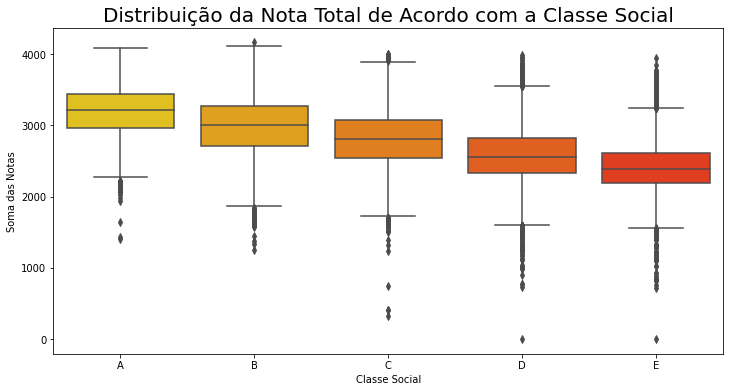

In [41]:
cria_boxplot(presentes,'NU_NOTA_TOTAL','Distribuição da Nota Total de Acordo com a Classe Social','Soma das Notas')

Conclusão: A diferença entre as notas permanece mesmo se considerarmos apenas quem participou de todas as provas

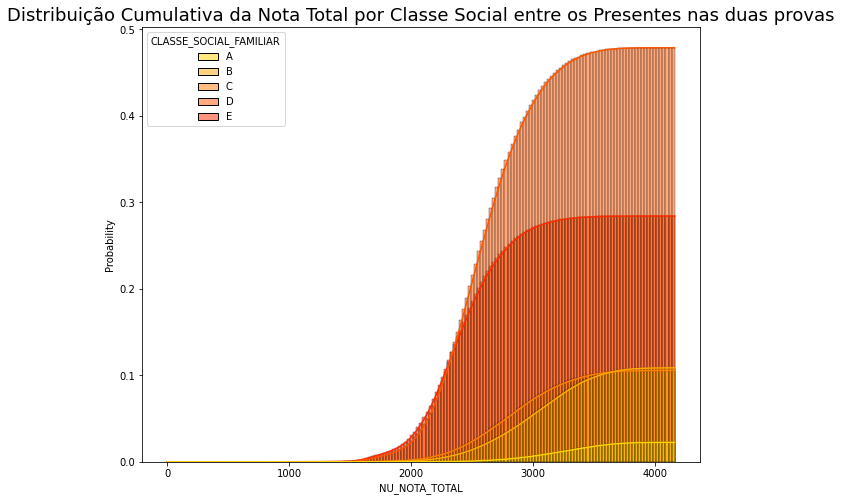

In [42]:
#visualizando a nota de Linguagem e códigos entre os inscritos do ENEM em 2019 (amostra)
plt.figure(figsize=(10,8))
ax = sns.histplot(presentes, x='NU_NOTA_TOTAL', kde=True, 
                  hue='CLASSE_SOCIAL_FAMILIAR', 
                  hue_order=['A', 'B', 'C', 'D', 'E'], 
                  palette='autumn_r', stat='probability', cumulative=True)
ax.set_title('Distribuição Cumulativa da Nota Total por Classe Social entre os Presentes nas duas provas', fontsize=18);

Vamos ver agora se esta tendência é replicada em todas as provas

## **Distribuição de Notas de Acordo com a Classe Social**

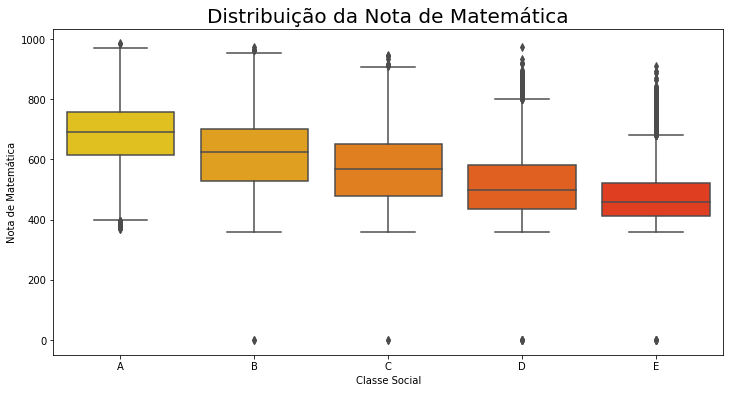

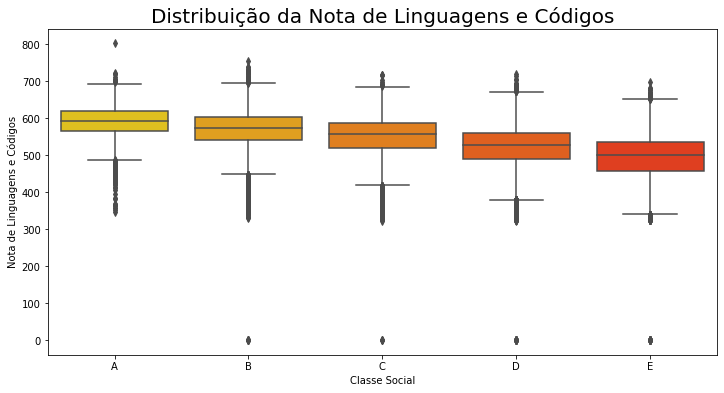

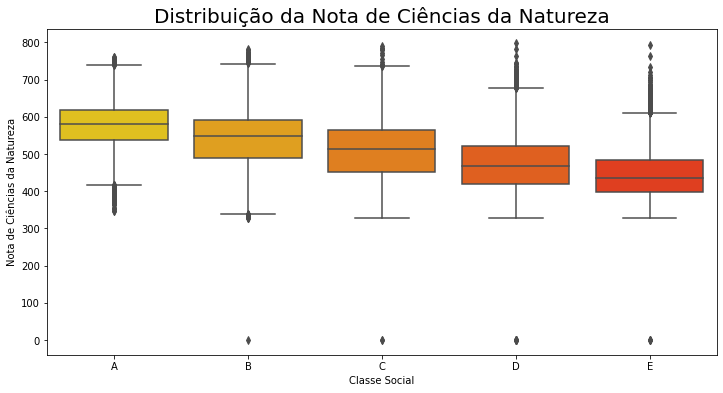

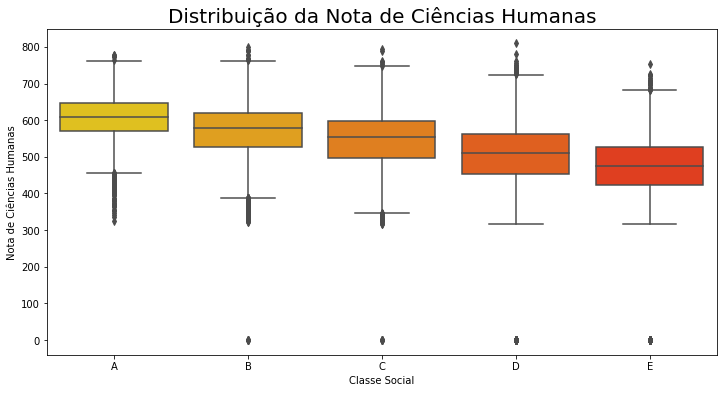

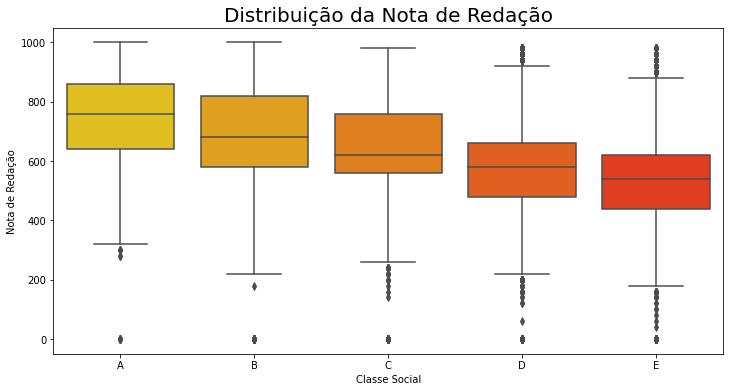

In [43]:
provas_sigla = {'MT': 'Matemática', 
          'LC': 'Linguagens e Códigos', 
          'CN': 'Ciências da Natureza', 
          'CH': 'Ciências Humanas', 
          'REDACAO': 'Redação'} 
for sigla, nome in zip(provas_sigla.keys(), provas_sigla.values()):
  cria_boxplot(presentes, f'NU_NOTA_{sigla}', f'Distribuição da Nota de {nome}', f'Nota de {nome}')

## **Usando a renda per capita para distinguir entre classes sociais**

Agora que criamos uma nova classificação usando a renda por pessoa no domicílio numa classe e a renda per capita do domicilio do inscrito como parâmetros, vamos revisitar nossas visualizações para ver qual o impacto desta mudança na distribuição das notas. Mas antes, vamos visualizar a distribuição das rendas familiar e per capita

### Distribuição das rendas Familiares

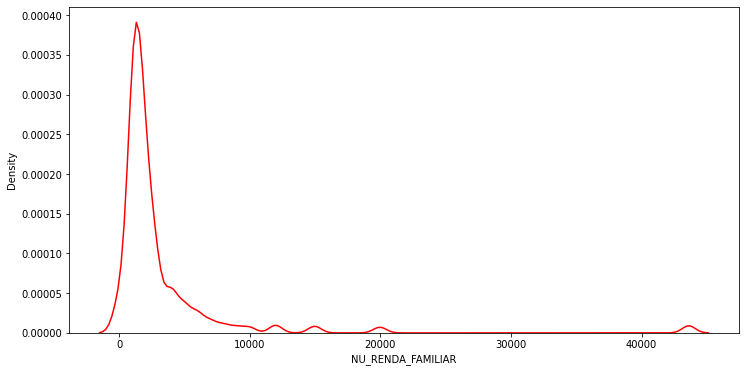

In [44]:
plt.figure(figsize=(12,6))
ax = sns.kdeplot(data = dados, x='NU_RENDA_FAMILIAR', color='r');

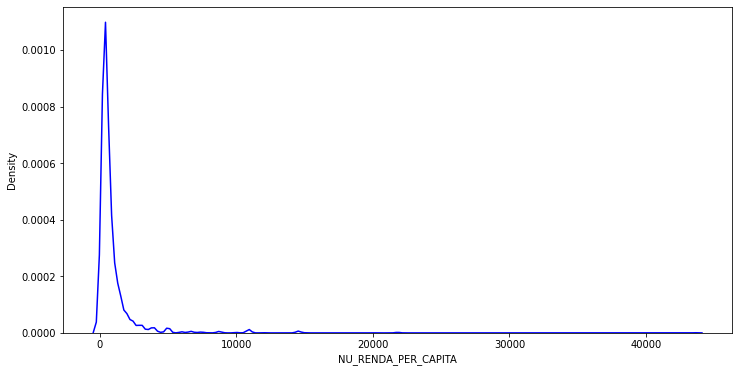

In [45]:
plt.figure(figsize=(12,6))
ax = sns.kdeplot(data = dados, x='NU_RENDA_PER_CAPITA', color='b');

In [46]:
def cria_boxplot_per_capita(data,y,title,ylabel):
  plt.figure(figsize=(12,6))
  ax = sns.boxplot(data=data, x='CLASSE_SOCIAL_PER_CAPITA', 
                  y=y, palette='autumn_r',order=['A', 'B', 'C', 'D', 'E'])
  ax.set_title(title, fontsize=20)
  ax.set_ylabel(ylabel)
  ax.set_xlabel('Classe Social');

**Visualizando a distribuição das notas usando nossa Classe Social per Capita**

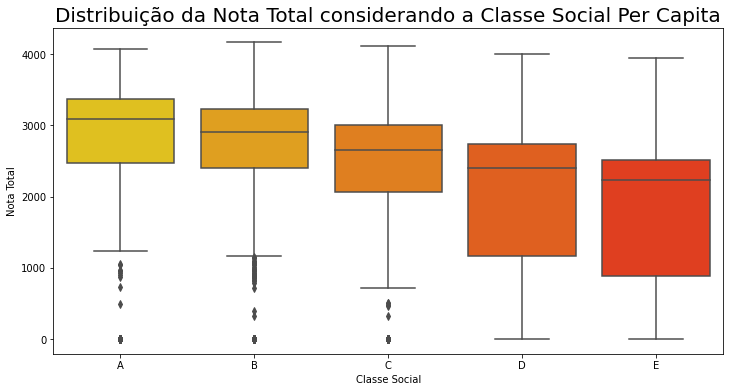

In [47]:
cria_boxplot_per_capita(dados, 'NU_NOTA_TOTAL', 
                        'Distribuição da Nota Total considerando a Classe Social Per Capita', 'Nota Total')

A tendência permanece mesmo considerando a renda per capita, vamos conferir agora se há alguma mudança no percentual de presentes se considerarmos a classe social per capita que criamos

In [48]:
#criando um dataframe para estimar o percentual de ausentes por classe social
presenca_parcial = pd.DataFrame([ausentes_em_pelo_menos_uma_das_provas['CLASSE_SOCIAL_PER_CAPITA'].value_counts(),dados['CLASSE_SOCIAL_PER_CAPITA'].value_counts()], index=['ausentes', 'total'], ).T
#organizando em ordem de classe social
presenca_parcial = presenca_parcial.sort_index(ascending=False)
#calculando a proporção de ausentes por classe social
presenca_parcial['proporcao'] = round((presenca_parcial['ausentes']/presenca_parcial['total'])*100,2)

In [49]:
presenca_parcial

,ausentes,total,proporcao
A,456,2107,21.64
B,2051,10947,18.74
C,2557,11044,23.15
D,17279,60855,28.39
E,12387,42275,29.30


Apesar de reduzir um pouco a diferença entre as novas classes, percebemos que a diferença entre as classes permanece, incluindo o fato da proporção de alunos de classe A ausentes ser maior do que a classe B, o que pode demonstrar que a influência da renda possui um limite na ausência dos candidatos

Vamos ver se há alguma mudança de tendência se considerarmos apenas os presentes e nossa classe social per capita

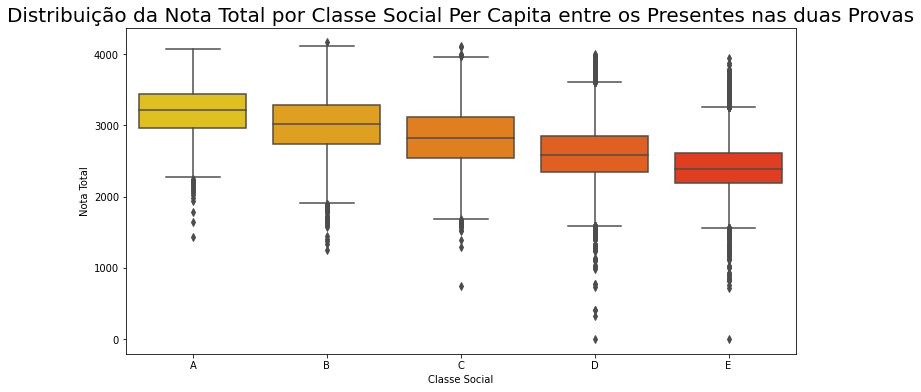

In [50]:
cria_boxplot_per_capita(presentes, 'NU_NOTA_TOTAL', 
                        'Distribuição da Nota Total por Classe Social Per Capita entre os Presentes nas duas Provas',
                        'Nota Total')

## **Testando um Algoritmo de Classificação**

Para finalizar nossa análise e colocar a teste nossas hipóteses de que há uma correlação entre a renda e a nota no ENEM, vamos ver como um algoritmo de classificação se comporta se usarmos apenas as notas como variáveis explicativas. Como não notamos uma diferença significativa entre a classe social familiar e a classe social per capita, vamos utilizar a primeira como nossa variável alvo



### **Tratamento de nulos**

Vamos colocar zero em todas as notas faltantes

In [53]:
#nossas variáveis explicativas serão das notas das 5 provas, substituindo as notas faltantes por 0
X = dados[provas].fillna(0)
y = dados['CLASSE_SOCIAL_FAMILIAR']

### **Dividindo nossos dados de treino e teste**


In [54]:
from sklearn.model_selection import train_test_split

In [60]:
#vamos estratificar nossas amostras para que nosso teste tenha a mesma proporção de classes que nosso treino
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, 
                                                    random_state=42, stratify=y)

### **Escolhendo um modelo**

Vamos escolher um algoritmo simples, apenas para determinar quão bem ele faria a distinção entre as classes

In [61]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
#criando nosso modelo
modelo = DecisionTreeClassifier(max_depth=5, random_state=42)

In [63]:
#ajustando nosso modelo aos dados de treino
modelo.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [64]:
#fazendo nossa predição
y_previsto = modelo.predict(X_test)

### Avaliando nosso modelo usando o Classification Report

In [65]:
from sklearn.metrics import classification_report

In [66]:
print(classification_report(y_test,y_previsto))

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           A       0.00      0.00      0.00       642
           B       0.38      0.21      0.27      3047
           C       0.00      0.00      0.00      3086
           D       0.52      0.86      0.64     15663
           E       0.49      0.21      0.30      9407

    accuracy                           0.51     31845
   macro avg       0.28      0.26      0.24     31845
weighted avg       0.44      0.51      0.43     31845



Conseguimos ver que o algoritmo se confunde bastante nos dados, e que a classe social não é o único fator que impacta as notas dos inscritos no ENEM de 2019. Vamos analisar outras variáveis com relação a renda:

## **Fazendo cruzamento da Renda com outros campos relevantes do nosso dataset**

### Status de Conclusão do Ensino Médio

In [71]:
#conclusão do ensino médio
conclusao

{1: 'ensino médio concluído',
 2: 'cursando, conclusão em 2019',
 3: 'cursando, conclusão após 2019',
 4: 'ensino médio não concluído e não cursando'}

In [86]:

#tabela cruzada entre renda social e conclusão do ensino médio pela média do total da nota
cross = pd.crosstab(index=dados['CLASSE_SOCIAL_FAMILIAR'], columns=dados['TP_ST_CONCLUSAO'].replace(conclusao),
            aggfunc='mean', values=dados['NU_NOTA_TOTAL']).round(2)
cross
            

TP_ST_CONCLUSAO,"cursando, conclusão após 2019","cursando, conclusão em 2019",ensino médio concluído,ensino médio não concluído e não cursando
CLASSE_SOCIAL_FAMILIAR,,,,
E,1976.29,1935.68,1622.12,1000.39
D,2282.05,2171.62,1713.31,1310.49
C,2556.35,2545.90,2040.77,1788.51
B,2666.96,2776.23,2245.70,2164.83
A,2767.26,2993.97,2226.75,2115.59


Conseguimos ver claramente que situação de conclusão do ensino médio também é um fator importante na nota total dos inscritos do ENEM, mas podemos perceber que em todas as situações de conclusão a média continua aumentando de acordo com a classe social. Interessante visualizar no entanto que, independentemente de classe social, a prova favorece os inscritos que estão cursando o ensino médio no ano em que o inscrito presta o exame.

### Por Tipo de Escola

In [80]:
tipo_escola

{1: 'sem resposta', 2: 'pública', 3: 'privada', 4: 'exterior'}

In [81]:
#tabela cruzada entre classe social e Tipo de Escola (Pública ou Privada) pela média do total da nota
pd.crosstab(index=dados['CLASSE_SOCIAL_FAMILIAR'], columns=dados['TP_ESCOLA'].replace(tipo_escola),
            aggfunc='mean', values=dados['NU_NOTA_TOTAL']).round(2)

TP_ESCOLA,privada,pública,sem resposta
CLASSE_SOCIAL_FAMILIAR,,,
E,2593.50,1920.03,1667.22
D,2749.57,2114.42,1784.59
C,2866.82,2432.65,2160.29
B,2955.86,2567.38,2394.57
A,3042.65,2647.40,2503.90


A média da nota total aumenta drasticamente entre os alunos de escola privada, o que sustenta a importância deste fator em nosso estudo, aqui vale a pena verificar a quantidade de alunos de cada classe social em cada tipo de escola, o que faremos abaixo

In [82]:
#tabela cruzada entre classe social e Tipo de Escola (Pública ou Privada) pela média do total da nota
pd.crosstab(index=dados['CLASSE_SOCIAL_FAMILIAR'], columns=dados['TP_ESCOLA'].replace(tipo_escola)).round(2)

TP_ESCOLA,privada,pública,sem resposta
CLASSE_SOCIAL_FAMILIAR,,,
E,260,10933,26437
D,1536,15521,45595
C,962,2726,8655
B,2051,1764,8372
A,719,101,1748


podemos ver claramente que a proporção de alunos em escola privada aumenta de acordo com a classe social do inscrito, o que parece ser um fator

### Por Localização da Escola

In [94]:
localizacao_escola

{1: 'urbana', 2: 'rural'}

In [100]:
#tabela cruzada entre classe social e localização da Escola (Rural ou Urbana) pela média do total da nota
pd.crosstab(index=dados['CLASSE_SOCIAL_FAMILIAR'], columns=dados['TP_LOCALIZACAO_ESC'].replace(localizacao_escola),
            aggfunc={'mean'}, values=dados['NU_NOTA_TOTAL']).round(2)

mean         
TP_LOCALIZACAO_ESC        rural   urbana
CLASSE_SOCIAL_FAMILIAR                  
E                       1814.60  1956.47
D                       2123.35  2185.91
C                       2464.67  2558.64
B                       2702.63  2800.05
A                           NaN  3082.69

In [96]:
pd.crosstab(index=dados['CLASSE_SOCIAL_FAMILIAR'], columns=dados['TP_LOCALIZACAO_ESC'].replace(localizacao_escola)).round(2)

TP_LOCALIZACAO_ESC,rural,urbana
CLASSE_SOCIAL_FAMILIAR,,
E,521,8699
D,394,13003
C,54,2714
B,34,2623
A,0,585


Vemos que apesar de exercer uma influência nas notas de 2019, a diferença é bem menos significativa que nos demais itens, no entanto vale a reflexão de que os números das escolas localizadas em zona rural são bem pequenos para tomarmos alguma decisão com base nesta amostra

### Por Idioma Estrangeiro Escolhido

In [101]:
idioma_estrangeiro

{0: 'inglês', 1: 'espanhol'}

In [102]:
#tabela cruzada entre classe social e o idioma escolhido pelo inscrito para a prova de língua estrangeira
#pela média do total da nota
pd.crosstab(index=dados['CLASSE_SOCIAL_FAMILIAR'], columns=dados['TP_LINGUA'].replace(idioma_estrangeiro),
            aggfunc={'mean'}, values=dados['NU_NOTA_TOTAL']).round(2)

mean         
TP_LINGUA              espanhol   inglês
CLASSE_SOCIAL_FAMILIAR                  
E                       1700.63  1834.49
D                       1787.64  2011.28
C                       2086.35  2395.14
B                       2253.26  2605.65
A                       2178.51  2722.93

Podemos ver que a média da nota total aumenta quando o idioma escolhido é o Inglês.

In [104]:
#vendo a proporção de inscritos que escolheram inglês e espanhol por classe social
pd.crosstab(index=dados['CLASSE_SOCIAL_FAMILIAR'], columns=dados['TP_LINGUA'].replace(idioma_estrangeiro)).round(2)

TP_LINGUA,espanhol,inglês
CLASSE_SOCIAL_FAMILIAR,,
E,24575,13055
D,33989,28663
C,4782,7561
B,3168,9019
A,295,2273


Podemos ver que quanto maior a renda, maior a proporção de alunos que escolhem o inglês, o que pode refletir na nota final

## **Conclusão**

Desta análise, concluímos que a classe social do inscrito influencia tanto sua presença no exame, quanto sua nota, o que aumenta o gap social, uma vez que os alunos de renda mais alta tem mais chances de cursar o ensino superior, usando seu desempenho no ENEM.